# Garbage Classifier - Test Notebook

<a target="_blank" href="https://colab.research.google.com/github/WholeNow/Garbage_Classifier/blob/main/notebooks/testing.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import os
import sys

# Environment detection
try:
    import google.colab
    IS_COLAB = True
except ImportError:
    IS_COLAB = False

if IS_COLAB:
    BASE_PATH = "/content"
    
    # Clone repository
    repo_name = "Garbage_Classifier"
    repo_url = "https://github.com/WholeNow/Garbage_Classifier.git"
    repo_path = os.path.join(BASE_PATH, repo_name)

    if not os.path.exists(repo_path):
        !git clone {repo_url}

    BASE_PATH = repo_path
    os.chdir(BASE_PATH)
    # Put project root first to avoid stdlib name collisions
    if BASE_PATH not in sys.path:
        sys.path.insert(0, BASE_PATH)
    
    print(f"Colab environment initialized: {BASE_PATH}")
else:
    # If local, assume the execution directory is 'notebooks' and move one level up
    BASE_PATH = os.getcwd()
    BASE_PATH = os.path.abspath(os.path.join(BASE_PATH, os.pardir)) 
    # Put project root first to avoid stdlib name collisions
    if BASE_PATH not in sys.path:
        sys.path.insert(0, BASE_PATH)
    print(f"Local environment initialized: {BASE_PATH}")

Local environment initialized: /Users/marcopilia/Desktop/Garbage_Classifier


/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <367D4265-B20F-34BD-94EB-4F3EE47C385B> /Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/marcopilia/miniconda3/e

[INFO] Seed set: 42
[INFO] Device: MPS (Apple Silicon)

[TEST] Starting model testing of 'Resnet18'
[INFO] Dataset -> Train: 9730, Val: 2085, Test: 2086


/Users/marcopilia/Desktop/Garbage_Classifier/utils.py:124: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=device)


[INFO] Model loaded from /Users/marcopilia/Desktop/Garbage_Classifier/Results/ResNet18/no_reg/Resnet18_no_reg_94.96_30.pth
[INFO] Saving wrong classified images to 'out_test/wrong_classified'


[TEST] Test Set Accuracy: 98.71%
[TEST] Test Set F1 Score: 0.99
[INFO] Confusion matrix saved to 'out_test/confusion_matrix.png'


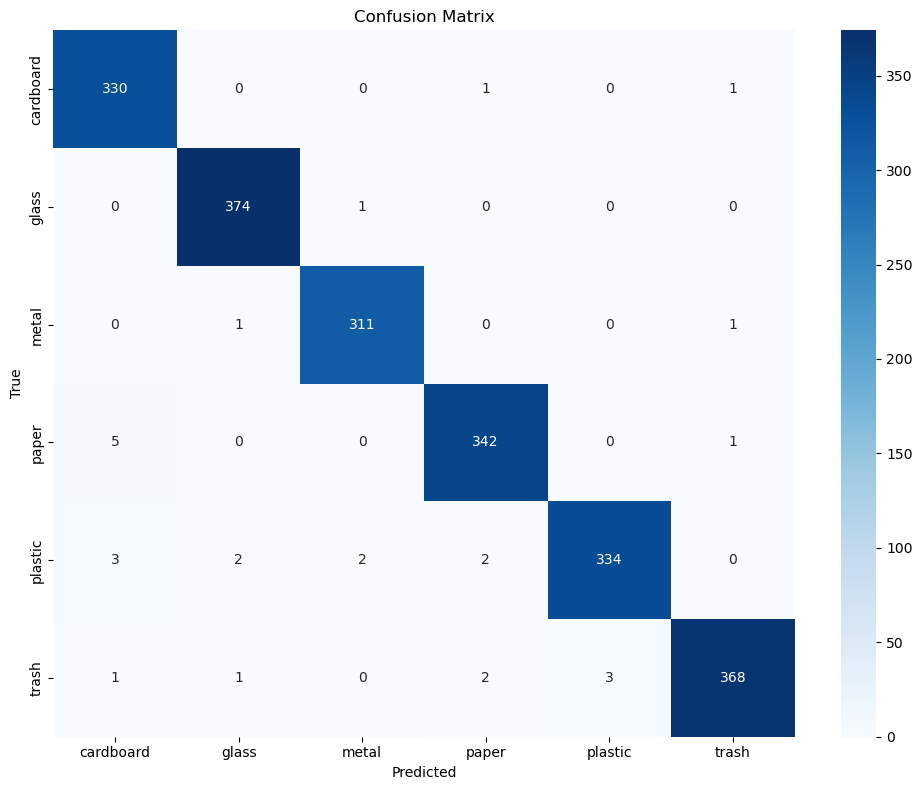

[INFO] Precision-Recall curve saved to 'out_test/precision_recall_curve.png'


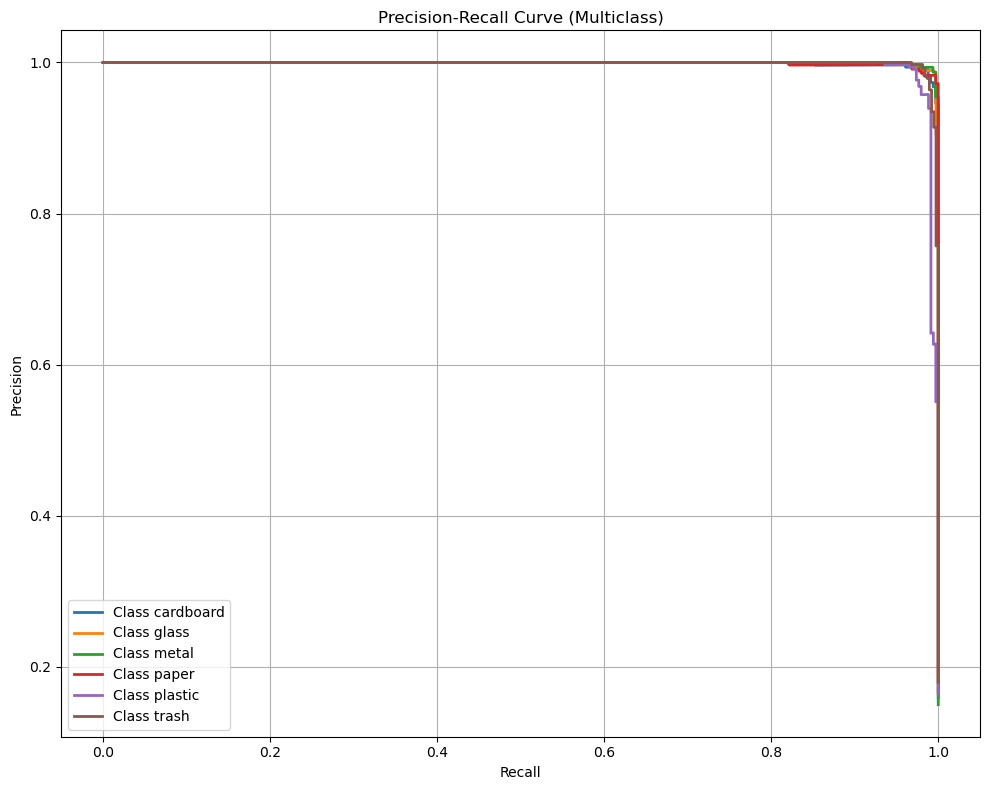

In [2]:
from config import TestConfig
from test import test

test_cfg = TestConfig(
    # Paths and Model
    root_dir='images',
    model_name='Resnet18', # must match checkpoint model name
    output_dir="out_test",
    save_wrong_images=True,

    # Inference Params
    batch_size=32,
    
    # Data Split
    val_split=0.15, # must be the same as training for correct split of validation set
    test_split=0.15, # must be the same as training for correct split of test set

    # Input Images
    img_size=224, # must match training

    # Normalization
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225],

    # System
    seed=42, # must be the same as training for correct split of test set
    num_workers=0,
    device="auto",
    checkpoint_path="/Users/marcopilia/Desktop/Garbage_Classifier/Results/ResNet18/no_reg/Resnet18_no_reg_94.96_30.pth",
)

test(test_cfg)